In [12]:
##imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pydataset import data
from scipy import stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest

#import warnings
#warnings.filterwarnings("ignore")


In [2]:
def split_data(df,target):
    ''' 
    takes in dataframe
    uses train test split on data frame using test size of 2, returns train_validate, test
    uses train test split on train_validate using test size of .3, returns train and validate
    returns train, validate test
    '''
    train_validate, test = train_test_split(df, test_size= .2, random_state=514,stratify = df[target])
    train, validate = train_test_split(train_validate, test_size= .3, random_state=514,stratify = train_validate[target])
    print(train.shape, validate.shape, test.shape)
    return train, validate, test

def scale_split_data (train, validate, test):
    ''' 
    takes in your three datasets
    applies minmax scaler to them using dtypes of number
    fits to those columns
    applies to copies of datasets
    returns datasets scaled
    '''
    #create scaler object
    scaler = MinMaxScaler()

    # create copies to hold scaled data
    train_scaled = train.copy(deep=True)
    validate_scaled = validate.copy(deep=True)
    test_scaled =  test.copy(deep=True)

    #create list of numeric columns for scaling
    num_cols = train.select_dtypes(include='number')

    #fit to data
    scaler.fit(num_cols)

    # apply
    train_scaled[num_cols.columns] = scaler.transform(train[num_cols.columns])
    validate_scaled[num_cols.columns] =  scaler.transform(validate[num_cols.columns])
    test_scaled[num_cols.columns] =  scaler.transform(test[num_cols.columns])

    return train_scaled, validate_scaled, test_scaled


def get_kmeans_cluster_features(train,train_scaled,validate,validate_scaled,test,test_scaled,dict_to_cluster):
    ''' 
    takes in your three datasets to apply the new featuers to as well as applying to the base datasets
    a dictionary (iterable lists with the last being the order of clustering (function to auto later))
    '''

    for i in range(len(list(dict_to_cluster))-1):
        #set features
        X1 = train_scaled[dict_to_cluster[list(dict_to_cluster)[i]]]
        X2 = validate_scaled[dict_to_cluster[list(dict_to_cluster)[i]]]
        X3 = test_scaled[dict_to_cluster[list(dict_to_cluster)[i]]]

        kmeans_scaled = KMeans(n_clusters=dict_to_cluster[list(dict_to_cluster)[len(list(dict_to_cluster))-1]][i],random_state=123)
        kmeans_scaled.fit(X1)

        X1["cluster"] = kmeans_scaled.predict(X1)
        X2["cluster"] = kmeans_scaled.predict(X2)
        X3["cluster"] = kmeans_scaled.predict(X3)

        train_scaled[f"cluster {list(dict_to_cluster)[i]}"] = X1["cluster"]
        train[f"cluster {list(dict_to_cluster)[i]}"] = X1["cluster"]

        validate_scaled[f"cluster {list(dict_to_cluster)[i]}"] = X2["cluster"]
        validate[f"cluster {list(dict_to_cluster)[i]}"] = X2["cluster"]

        test_scaled[f"cluster {list(dict_to_cluster)[i]}"] = X3["cluster"]
        test[f"cluster {list(dict_to_cluster)[i]}"] = X3["cluster"]

    return train,train_scaled,validate,validate_scaled,test,test_scaled

# feature names are unknown to protect confidentiality, will create features and see how they interact

In [3]:
df = pd.read_csv("~/Downloads/creditcard.csv")

target="Class"

indicate = ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

df["indicate"] = 1
for i in indicate:
    df["indicate"] = df['indicate']*df[i]

dict_to_cluster = { "zero":['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'],
                    "one":['V3', 'V4', 'V9'],
                    "two":['V10', 'V11', 'V12'],
                    "three":['V14', 'V16', 'V17'],
                    "cluster_order":[4,4,4,4]}
cluster_list = ["cluster zero","cluster one","cluster two","cluster three"]

train,validate,test = split_data(df,target)
train_scaled, validate_scaled, test_scaled = scale_split_data(train,validate,test)
train, train_scaled, validate, validate_scaled, test, test_scaled = get_kmeans_cluster_features(train,train_scaled,validate,validate_scaled,test,test_scaled,dict_to_cluster )

## changing class to better describe what we're looking for in exploration, and will change back
train["Fraud"] = train.Class.map({0:"No-Fraud",1:"Yes-Fraud"})

(159491, 32) (68354, 32) (56962, 32)


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_79698/843166289.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1["cluster"] = kmeans_scaled.predict(X1)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_79698/843166289.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2["cluster"] = kmeans_scaled.predict(X2)
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_79698/843166289.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [21]:
train_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,indicate,cluster zero,cluster one,cluster two,cluster three
164298,0.674904,0.898321,0.788949,0.769553,0.148174,0.539143,0.500261,0.547591,0.760863,0.541165,...,0.384607,0.636875,0.358174,0.000200,0.0,0.99971,2,1,1,0
76785,0.328377,0.935392,0.772644,0.810427,0.288244,0.506894,0.505365,0.512387,0.783621,0.399772,...,0.369222,0.651217,0.426128,0.001423,0.0,0.99971,0,3,0,1
19931,0.177427,0.969848,0.756863,0.805953,0.283200,0.496553,0.521922,0.494344,0.785680,0.445651,...,0.481048,0.650480,0.421739,0.002245,0.0,0.99971,0,3,0,2
74935,0.323036,0.964549,0.758538,0.785397,0.304340,0.503369,0.502184,0.508468,0.781557,0.406975,...,0.368134,0.649730,0.422520,0.008997,0.0,0.99971,0,3,3,1
221353,0.824905,0.893323,0.737367,0.817020,0.298223,0.517347,0.525257,0.510584,0.786849,0.376467,...,0.790590,0.645326,0.420188,0.020150,0.0,0.99971,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122359,0.442897,0.969918,0.757453,0.792481,0.278394,0.503796,0.529885,0.496542,0.787866,0.433246,...,0.502502,0.649753,0.420411,0.000529,0.0,0.99971,2,3,1,0
111150,0.417351,0.970898,0.764821,0.787661,0.295644,0.506335,0.502713,0.505842,0.783222,0.396453,...,0.361627,0.650119,0.421020,0.000270,0.0,0.99971,2,3,1,1
153156,0.567434,0.918689,0.773142,0.772759,0.167238,0.555140,0.602563,0.502222,0.786534,0.447267,...,0.508676,0.650133,0.422563,0.000287,0.0,0.99971,1,1,2,1
179483,0.718187,0.988948,0.747211,0.758437,0.227683,0.501708,0.525922,0.493107,0.786311,0.408387,...,0.283720,0.650491,0.419631,0.004061,0.0,0.99971,2,0,3,0


In [37]:
model = IsolationForest(contamination=.2,random_state=123)
v_list = ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
model.fit(train_scaled[v_list])
train["if1_scores"] = model.decision_function(train_scaled[v_list])
train["if1_anomaly"] =model.predict((train_scaled[v_list]))

train[["if1_anomaly","Class"]].groupby(["if1_anomaly"]).agg(["count","mean"])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Class          
              count      mean
if1_anomaly                  
-1            31898  0.007963
 1           127593  0.000172

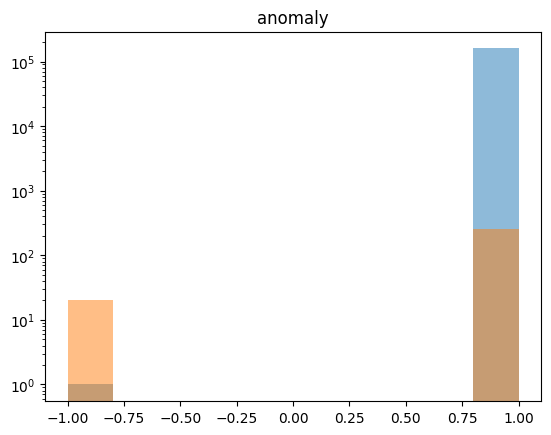

In [35]:
plt.title("anomaly") # Title with column name.
train[train["Class"]==0]["if1_anomaly"].hist(bins=10,alpha=.5) # Display histogram for column.
train[train["Class"]==1]["if1_anomaly"].hist(bins=10,alpha=.5) # Display histogram for column.
plt.yscale("log")
plt.grid(False) # Hide gridlines

Observed
[[57908 36536 54223 10548]
 [   18     2    72   184]]
---
Expected
[[5.78257588e+04 3.64747708e+04 5.42010422e+04 1.07134282e+04]
 [1.00241242e+02 6.32291979e+01 9.39577782e+01 1.85717815e+01]]
---
chi^2 = 1608.2330, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶i̶n̶d̶e̶p̶e̶n̶d̶a̶n̶t̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶z̶e̶r̶o̶ )


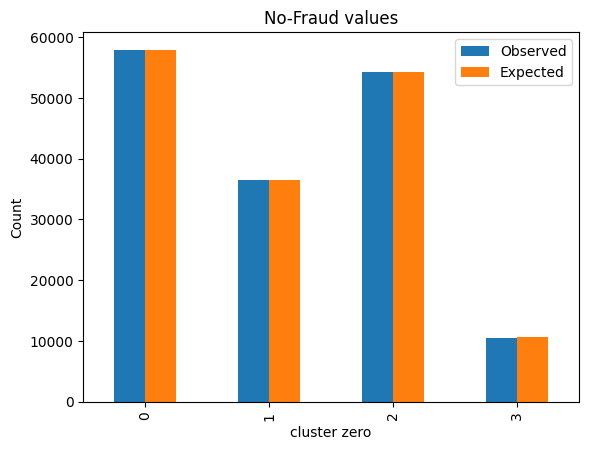

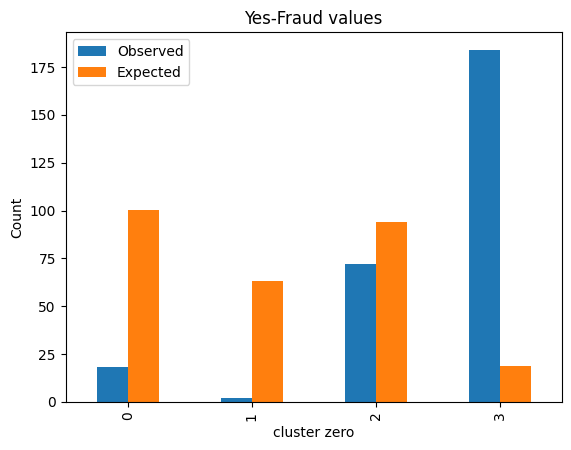

Observed
[[51018 21546 10563 76088]
 [    6     1   224    45]]
---
Expected
[[5.09357027e+04 2.15097128e+04 1.07683330e+04 7.60012514e+04]
 [8.82972958e+01 3.72871949e+01 1.86669593e+01 1.31748550e+02]]
---
chi^2 = 2431.9711, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶i̶n̶d̶e̶p̶e̶n̶d̶a̶n̶t̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶o̶n̶e̶ )


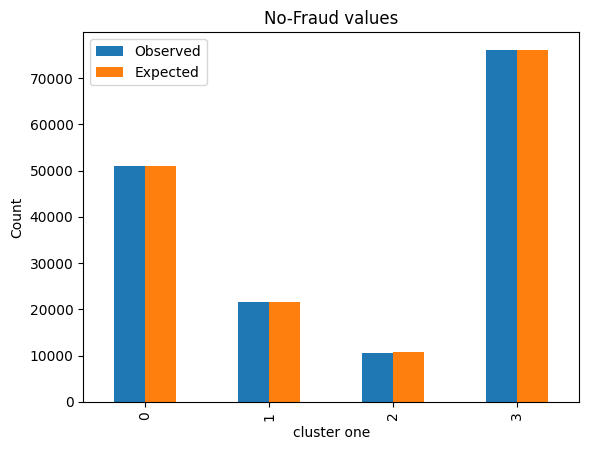

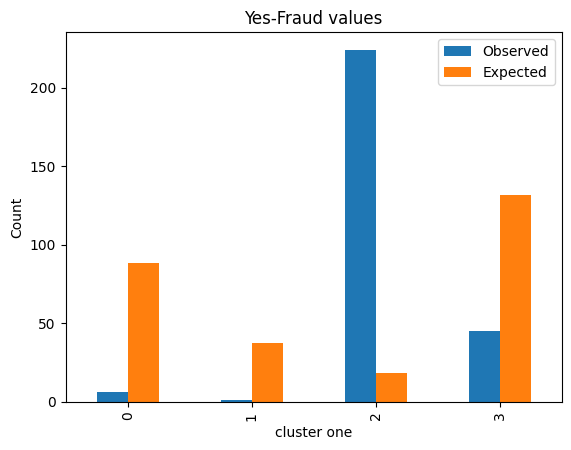

Observed
[[45517 45079 11383 57236]
 [   12    17   232    15]]
---
Expected
[[4.54502118e+04 4.50179611e+04 1.15949002e+04 5.71519268e+04]
 [7.87881699e+01 7.80388611e+01 2.00998175e+01 9.90731515e+01]]
---
chi^2 = 2413.8144, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶i̶n̶d̶e̶p̶e̶n̶d̶a̶n̶t̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶w̶o̶ )


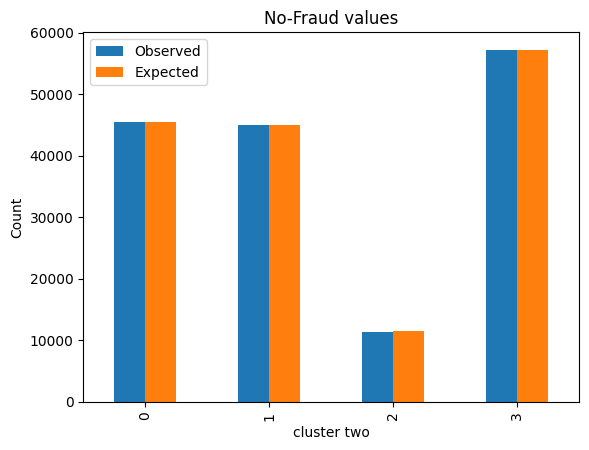

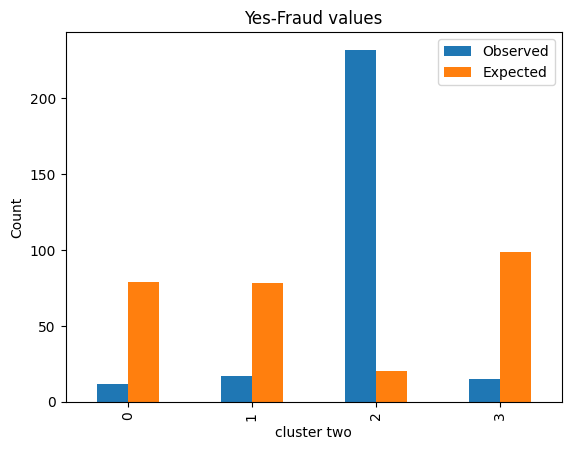

Observed
[[47718 78647 32821    29]
 [   66     9    59   142]]
---
Expected
[[4.77013095e+04 7.85198854e+04 3.28231010e+04 1.70704084e+02]
 [8.26904590e+01 1.36114615e+02 5.68990100e+01 2.95916384e-01]]
---
chi^2 = 68097.1650, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶i̶n̶d̶e̶p̶e̶n̶d̶a̶n̶t̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶h̶r̶e̶e̶ )


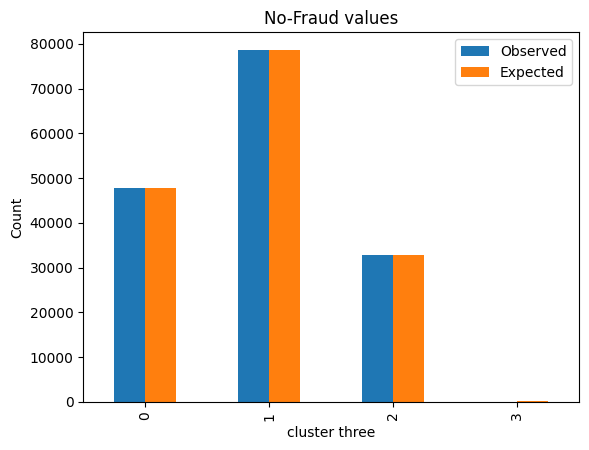

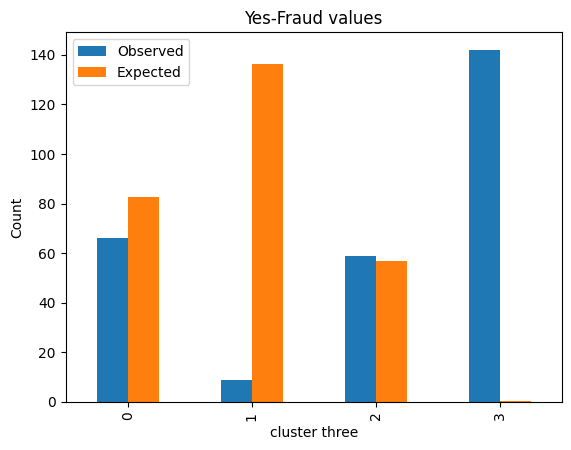

In [4]:
# creates a column of the payments for easy analysis, runs a crosstab to put into a chi2 independancy test.
# produces observed and expected values
# returns the chi2 and pval for the whole set
for i in cluster_list:

    df1 = pd.crosstab(train["Fraud"],train[i])

    alpha = .05
    chi2, p, degf, expected = stats.chi2_contingency(df1)
    H0 = (f"{df1.index.name} is independant of {df1.columns.name}")
    H1 = (f"{df1.index.name} is not independant of {df1.columns.name}")
    print('Observed')
    print(df1.values)
    print('---\nExpected')
    dfexpected = df1.copy()
    for i in range(len(dfexpected)):
        dfexpected.iloc[i] = expected[i]
    print(dfexpected.values)
    print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
    if p>alpha:
        print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis\n({H0})")
    else:
        print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n( ", '\u0336'.join(H0) + '\u0336' , ")")

    #plot the results
    for i,col in enumerate(df1.T.columns):
        pd.concat({'Observed': df1.T[col], 'Expected': dfexpected.T[col]}, axis=1).plot.bar()
        plt.ylabel("Count")
        plt.title(f'{col} values') # Title with column name.
        plt.show()


Cluster0-3, Cluster1-2, Cluster2-2, and Cluster3-3 will all be good drivers for determining fraud

In [8]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,indicate,cluster zero,cluster one,cluster two,cluster three,Fraud
164298,116618.0,-1.917214,2.360857,-0.541292,-2.270248,2.170464,-0.961343,3.427261,-2.286056,3.334185,...,-0.454608,-1.739137,3.78,0,1.743665e+02,2,1,1,0,No-Fraud
76785,56741.0,-0.326266,1.062432,1.218863,0.877946,-0.063750,-0.731441,0.824376,-0.164448,-0.444057,...,0.043309,0.152724,26.90,0,4.300773e-04,0,3,0,1,No-Fraud
19931,30658.0,1.152464,-0.194226,1.026204,0.764573,-0.780215,0.014423,-0.509632,0.027441,0.781880,...,0.017731,0.030535,42.45,0,1.131500e-02,0,3,0,2,No-Fraud
74935,55818.0,0.925078,-0.060813,0.140973,1.239721,-0.307980,-0.874732,0.534606,-0.356948,-0.251597,...,-0.008312,0.052279,170.13,0,1.859196e-07,0,3,3,1,No-Fraud
221353,142537.0,-2.131722,-1.746730,1.502770,1.102237,0.660407,0.164645,0.691076,0.136400,-1.066810,...,-0.161192,-0.012641,381.04,0,5.247456e-02,3,3,3,1,No-Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122359,76529.0,1.155468,-0.147214,0.446042,0.656559,-0.278421,0.373135,-0.347142,0.231199,0.450403,...,-0.007504,-0.006428,10.00,0,6.620377e-06,2,3,1,0,No-Fraud
111150,72115.0,1.197556,0.439484,0.238488,1.044275,-0.102496,-0.850878,0.340471,-0.201666,-0.532753,...,0.005196,0.010519,5.10,0,2.459009e-04,2,3,1,1,No-Fraud
153156,98048.0,-1.043097,1.102120,-0.403234,-1.841771,3.278751,3.647057,0.072836,0.107068,0.825083,...,0.005703,0.053466,5.43,0,7.606971e-01,1,1,2,1,No-Fraud
179483,124097.0,1.972209,-0.962857,-1.020015,-0.483226,-0.423093,0.194608,-0.601087,0.086321,-0.213862,...,0.018123,-0.028143,76.79,0,-1.776780e-03,2,0,3,0,No-Fraud


Class =target | cluster zero =pop name | 2 =samp name

 We reject the null Hypothesis ( 2̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶z̶e̶r̶o̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-2.58944, p=0.00962
Class =target | cluster zero =pop name | 0 =samp name

 We reject the null Hypothesis ( 0̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶z̶e̶r̶o̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-19.38729, p=0.00000
Class =target | cluster zero =pop name | 3 =samp name

 We reject the null Hypothesis ( 3̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶z̶e̶r̶o̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=12.30087, p=0.00000
Class =target | cluster zero =pop name | 1 =samp name

 We reject the null Hypothesis ( 1̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶

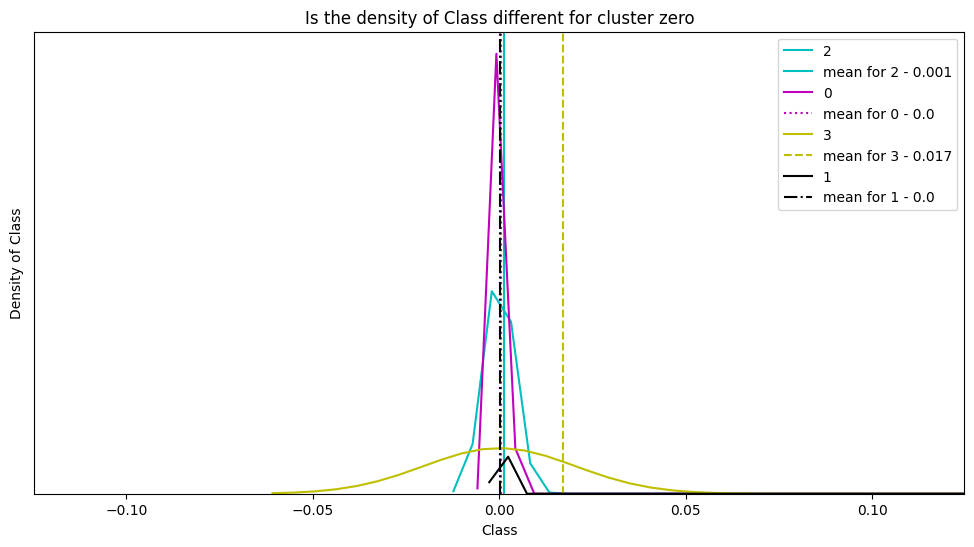

Class =target | cluster one =pop name | 1 =samp name

 We reject the null Hypothesis ( 1̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶o̶n̶e̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-36.28719, p=0.00000
Class =target | cluster one =pop name | 3 =samp name

 We reject the null Hypothesis ( 3̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶o̶n̶e̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-12.93545, p=0.00000
Class =target | cluster one =pop name | 0 =samp name

 We reject the null Hypothesis ( 0̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶o̶n̶e̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-33.59938, p=0.00000
Class =target | cluster one =pop name | 2 =samp name

 We reject the null Hypothesis ( 2̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶

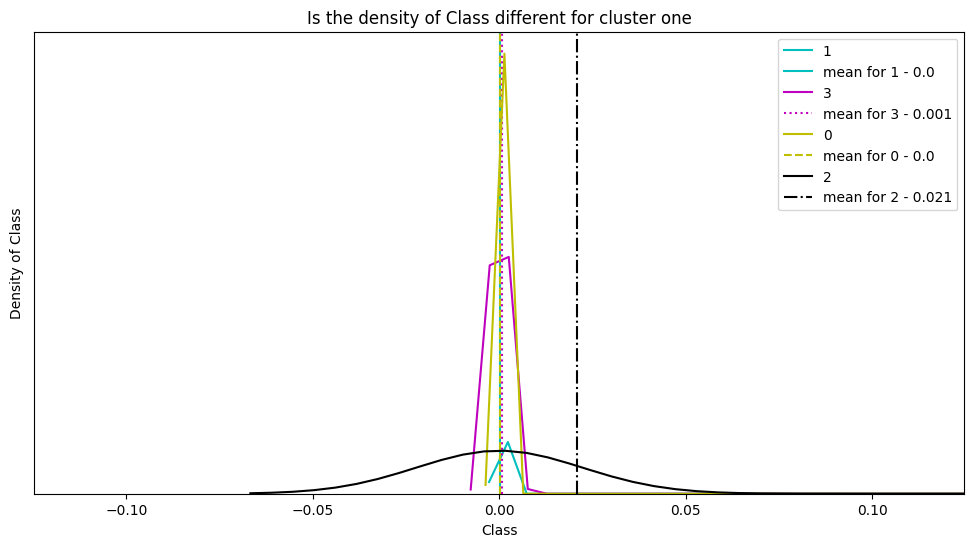

Class =target | cluster two =pop name | 1 =samp name

 We reject the null Hypothesis ( 1̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶w̶o̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-14.80673, p=0.00000
Class =target | cluster two =pop name | 0 =samp name

 We reject the null Hypothesis ( 0̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶w̶o̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-19.28241, p=0.00000
Class =target | cluster two =pop name | 3 =samp name

 We reject the null Hypothesis ( 3̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶w̶o̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-21.71025, p=0.00000
Class =target | cluster two =pop name | 2 =samp name

 We reject the null Hypothesis ( 2̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶

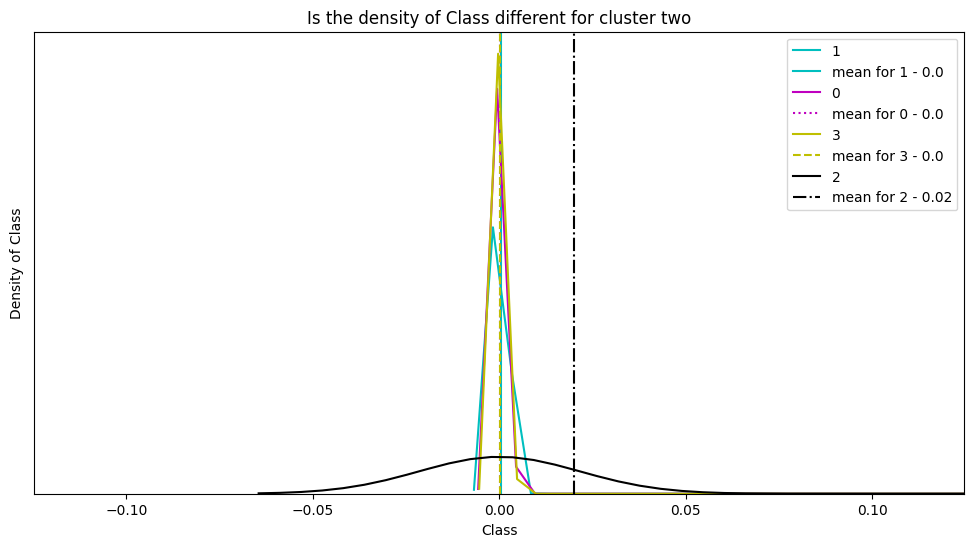

Class =target | cluster three =pop name | 0 =samp name

 We fail to reject the null hypothesis ( 0 as a sample has equal mean values to cluster three as a population regarding Class ) t=-2.05585, p=0.03980
Class =target | cluster three =pop name | 1 =samp name

 We reject the null Hypothesis ( 1̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶h̶r̶e̶e̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=-42.37369, p=0.00000
Class =target | cluster three =pop name | 2 =samp name

 We fail to reject the null hypothesis ( 2 as a sample has equal mean values to cluster three as a population regarding Class ) t=0.27377, p=0.78427
Class =target | cluster three =pop name | 3 =samp name

 We reject the null Hypothesis ( 3̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶t̶h̶r̶e̶e̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶C̶l̶a̶s̶s̶ ) t=28.79146, p=0.00000


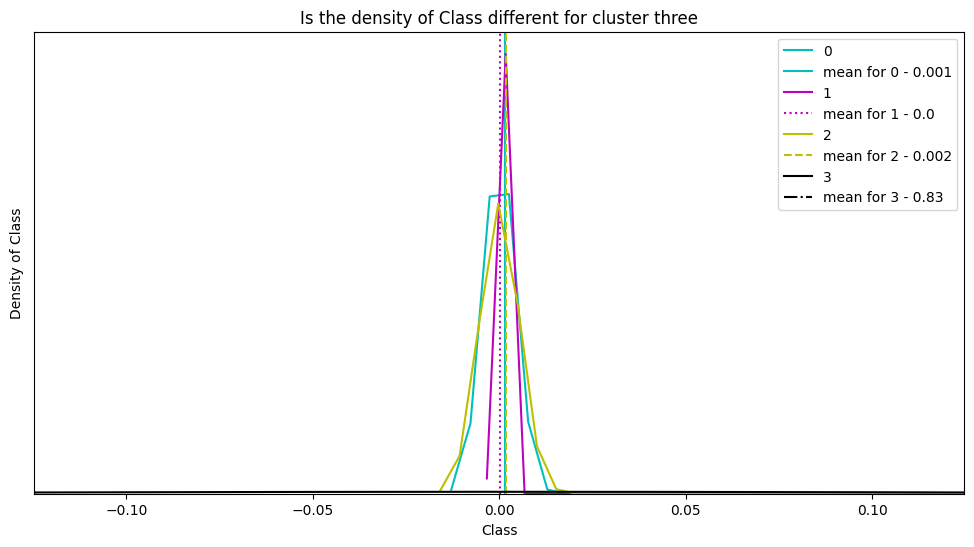

In [10]:

for each in train.iloc[:,-5:-1].columns:
    # sets variables
    target = "Class"
    alpha = .025
    population_name = each
    for sub_cat in train[each].unique():
        sample_name = sub_cat

        print(target,"=target |",population_name,"=pop name |",sample_name,"=samp name")
        
        #sets null hypothesis
        H0 = f"{sample_name} as a sample has equal mean values to {population_name} as a population regarding {target}"
        Ha = f"{sample_name} as a sample does not have equal mean values to {population_name} as a population regarding {target}"

        #runs test and prints results
        t, p = stats.ttest_1samp( train[train[population_name] == sample_name][target], train[target].mean())
        if p > alpha:
            print("\n We fail to reject the null hypothesis (",(H0) , ")",'t=%.5f, p=%.5f' % (t,p))
        else:
            print("\n We reject the null Hypothesis (", '\u0336'.join(H0) + '\u0336' ,")",'t=%.5f, p=%.5f' % (t,p))



 #   #creates a temp train that assists in plotting the feature
 #   temp1 = train.copy()
 #   #does the plotting
 #   plt.figure(figsize=(12,6))
 #   sns.barplot(
 #       data=temp1, x=population_name, y=each,
 #       linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
 #   )
 #   plt.axhline(y=temp1[each].mean(),label=f"{each} Mean {round(temp1[each].mean(),3)}",color="black")
 #   plt.legend()
 #   plt.title("Class Compared in relation to {each}")
 #   plt.show()



    plt.figure(figsize=(12,6))
    plt.title(f"Is the density of {target} different for {population_name}")


    plt.ylabel(f"Density of {target}")
    plt.yticks([],[])

    colorlist=['c', 'm', 'y', 'k']
    linestyle_list = ['solid', 'dotted','dashed','dashdot']

    for i in enumerate(train[population_name].unique()):

        sns.kdeplot(train[train[population_name] == i[1]][target],
                    label=f"{i[1]}",
                    color=colorlist[i[0]])
        plt.axvline(train[train[population_name] == i[1]][target].mean(),
                    color=colorlist[i[0]],
                    ls=linestyle_list[i[0]],
                    label=f"mean for {i[1]} - {round(train[train[population_name] == i[1]][target].mean(),3)}")
    plt.legend()
    plt.xlim((-3*train[target].std()),3*train[target].std())
    plt.show()



Confirms what i saw in my CHI^2 tests

In [11]:
## does a levene test for comparing variance, creates a boolean flag that is passed into the ttest for
## comparing the Fraud monthly charge and the Not Fraud monthly charge
## then plots the graphs for a visual

cat = "indicate"

H0 = "Feature Engineered of Fraud is equal to Feature Engineered of Not Fraud"
Ha = "Feature Engineered of Fraud is less than or greater than Feature Engineered of Not Fraud"
alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(train[train[target]==1][cat],train[train[target]==0][cat])
stat,pval
if pval > 0.05:
    equal_var_flag = True
    print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))


t, p = stats.ttest_ind( train[train[target]==1][cat], train[train[target]==0][cat], equal_var = equal_var_flag )

if p > alpha: #directionality, or if t is negative
    print("\n We fail to reject the null hypothesis (",(H0) , ")",'t=%.5f, p=%.5f' % (t,p))
else:
     print("\n We reject the null Hypothesis (", '\u0336'.join(H0) + '\u0336' ,")",'t=%.5f, p=%.5f' % (t,p))


we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=28454.89720, p=0.00000

 We reject the null Hypothesis ( F̶e̶a̶t̶u̶r̶e̶ ̶E̶n̶g̶i̶n̶e̶e̶r̶e̶d̶ ̶o̶f̶ ̶F̶r̶a̶u̶d̶ ̶i̶s̶ ̶e̶q̶u̶a̶l̶ ̶t̶o̶ ̶F̶e̶a̶t̶u̶r̶e̶ ̶E̶n̶g̶i̶n̶e̶e̶r̶e̶d̶ ̶o̶f̶ ̶N̶o̶t̶ ̶F̶r̶a̶u̶d̶ ) t=-7.04684, p=0.00000


The feature engineered "indicate" which is a product of the features with the highest outliers is a significant player in determining fraud